<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-24 20:04:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  40.1MB/s    in 5.5s    

2025-08-24 20:04:32 (36.6 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


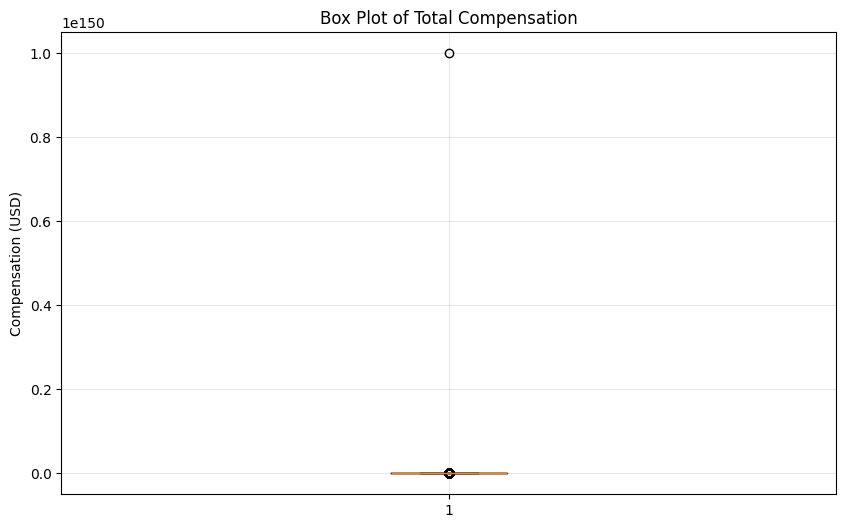

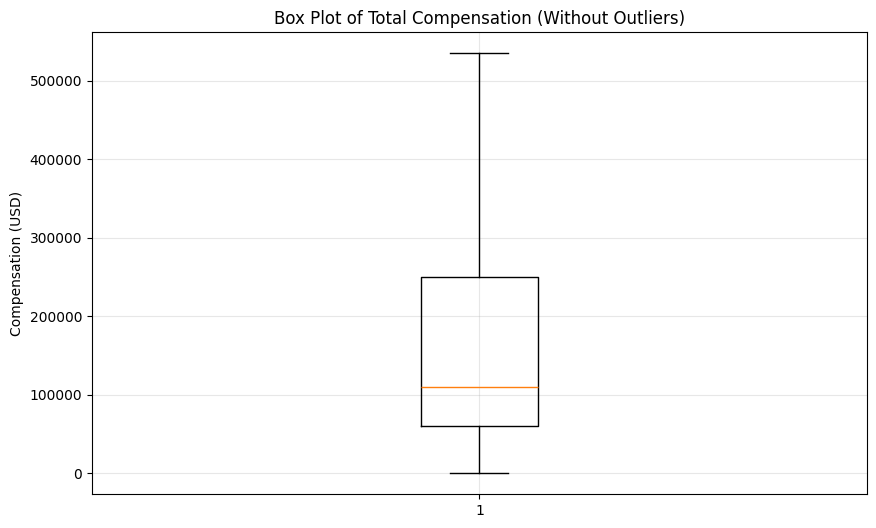

In [21]:
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
"""
df_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.boxplot(df_comp['CompTotal'])
plt.title('Box Plot of Total Compensation')
plt.ylabel('Compensation (USD)')
plt.grid(True, alpha=0.3)
plt.show()

# Remove outliers for better visualization
plt.figure(figsize=(10, 6))
plt.boxplot(df_comp['CompTotal'], showfliers=False)
plt.title('Box Plot of Total Compensation (Without Outliers)')
plt.ylabel('Compensation (USD)')
plt.grid(True, alpha=0.3)
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


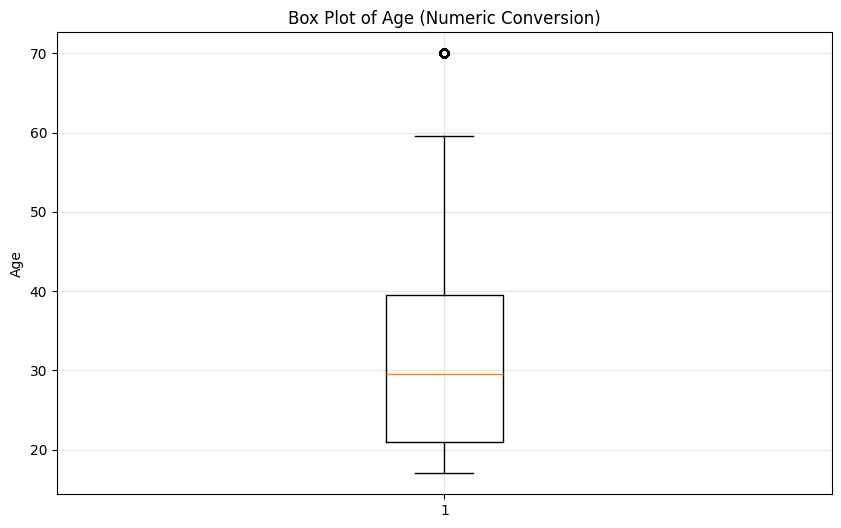

In [23]:
import numpy as np
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL AND Age != 'NA'
"""
df_age = pd.read_sql_query(QUERY, conn)

# Convert age categories to numeric values
def convert_age_to_numeric(age_str):
    if pd.isna(age_str):
        return np.nan
    if 'Under 18' in age_str:
        return 17
    elif '18-24' in age_str:
        return 21
    elif '25-34' in age_str:
        return 29.5
    elif '35-44' in age_str:
        return 39.5
    elif '45-54' in age_str:
        return 49.5
    elif '55-64' in age_str:
        return 59.5
    elif '65 years or older' in age_str:
        return 70
    else:
        return np.nan

df_age['Age_numeric'] = df_age['Age'].apply(convert_age_to_numeric)
df_age = df_age.dropna(subset=['Age_numeric'])

plt.figure(figsize=(10, 6))
plt.boxplot(df_age['Age_numeric'])
plt.title('Box Plot of Age (Numeric Conversion)')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


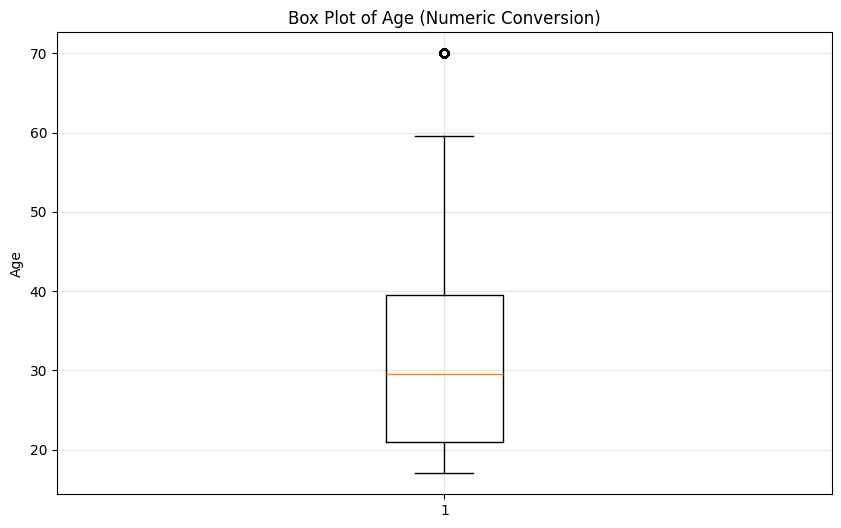

In [24]:
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL AND Age != 'NA'
"""
df_age = pd.read_sql_query(QUERY, conn)

# Convert age categories to numeric values
def convert_age_to_numeric(age_str):
    if pd.isna(age_str):
        return np.nan
    if 'Under 18' in age_str:
        return 17
    elif '18-24' in age_str:
        return 21
    elif '25-34' in age_str:
        return 29.5
    elif '35-44' in age_str:
        return 39.5
    elif '45-54' in age_str:
        return 49.5
    elif '55-64' in age_str:
        return 59.5
    elif '65 years or older' in age_str:
        return 70
    else:
        return np.nan

df_age['Age_numeric'] = df_age['Age'].apply(convert_age_to_numeric)
df_age = df_age.dropna(subset=['Age_numeric'])

plt.figure(figsize=(10, 6))
plt.boxplot(df_age['Age_numeric'])
plt.title('Box Plot of Age (Numeric Conversion)')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipython-input-1616100203.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_sat_data, labels=job_sat_levels, showfliers=False)


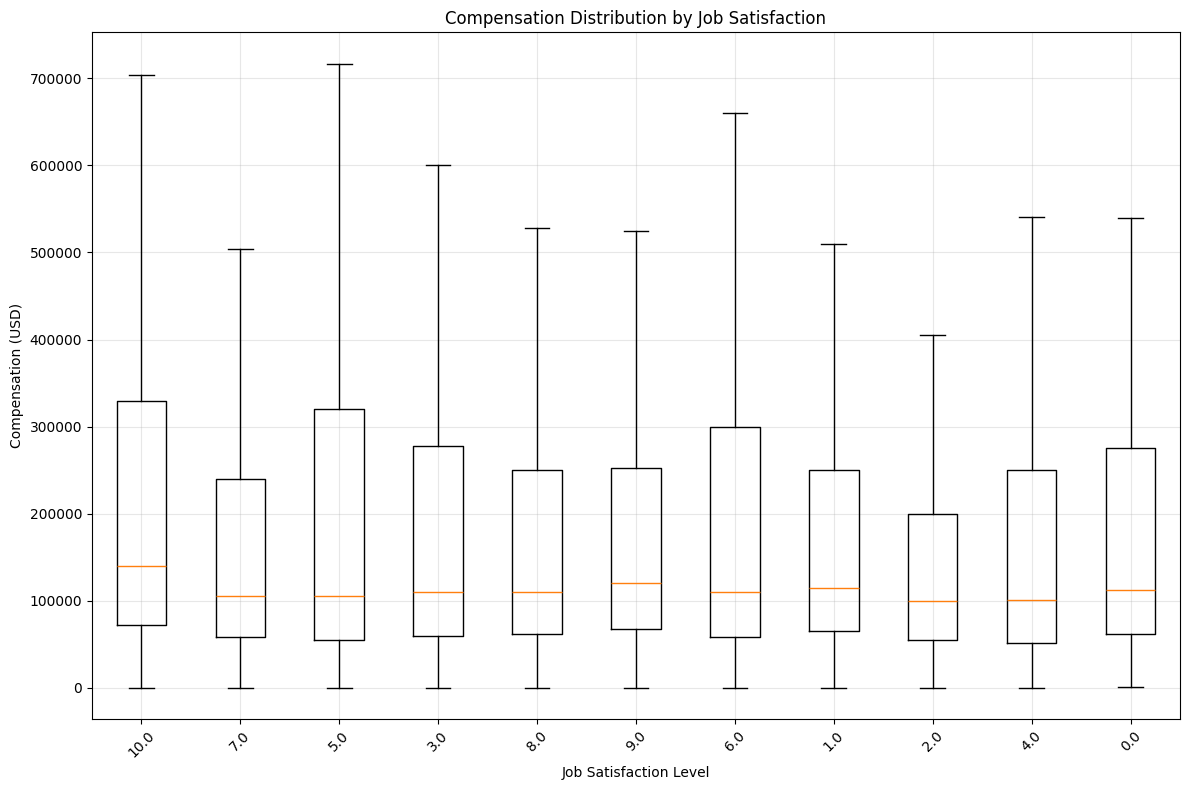

/tmp/ipython-input-1616100203.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_sat_data, labels=job_sat_levels, showfliers=False)


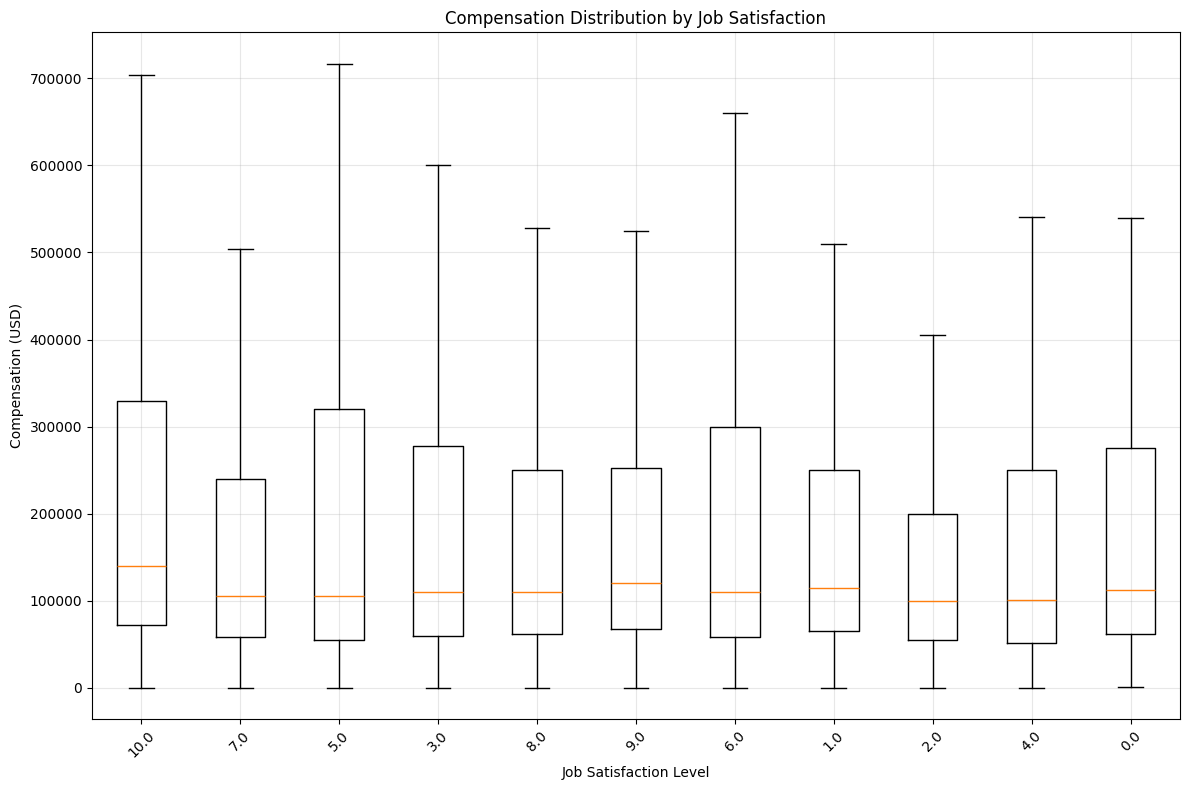

In [25]:
QUERY = """
SELECT JobSat, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
AND JobSat IS NOT NULL AND JobSat != 'NA'
"""
df_job_comp = pd.read_sql_query(QUERY, conn)

# Get job satisfaction levels
job_sat_levels = df_job_comp['JobSat'].unique()

# Prepare data for box plot
job_sat_data = []
for job_sat in job_sat_levels:
    data = df_job_comp[df_job_comp['JobSat'] == job_sat]['CompTotal']
    job_sat_data.append(data)

plt.figure(figsize=(12, 8))
plt.boxplot(job_sat_data, labels=job_sat_levels, showfliers=False)
plt.title('Compensation Distribution by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()# your code goes here
QUERY = """
SELECT JobSat, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
AND JobSat IS NOT NULL AND JobSat != 'NA'
"""
df_job_comp = pd.read_sql_query(QUERY, conn)

# Get job satisfaction levels
job_sat_levels = df_job_comp['JobSat'].unique()

# Prepare data for box plot
job_sat_data = []
for job_sat in job_sat_levels:
    data = df_job_comp[df_job_comp['JobSat'] == job_sat]['CompTotal']
    job_sat_data.append(data)

plt.figure(figsize=(12, 8))
plt.boxplot(job_sat_data, labels=job_sat_levels, showfliers=False)
plt.title('Compensation Distribution by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipython-input-2525161869.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dev_type_data, labels=short_labels, showfliers=False)


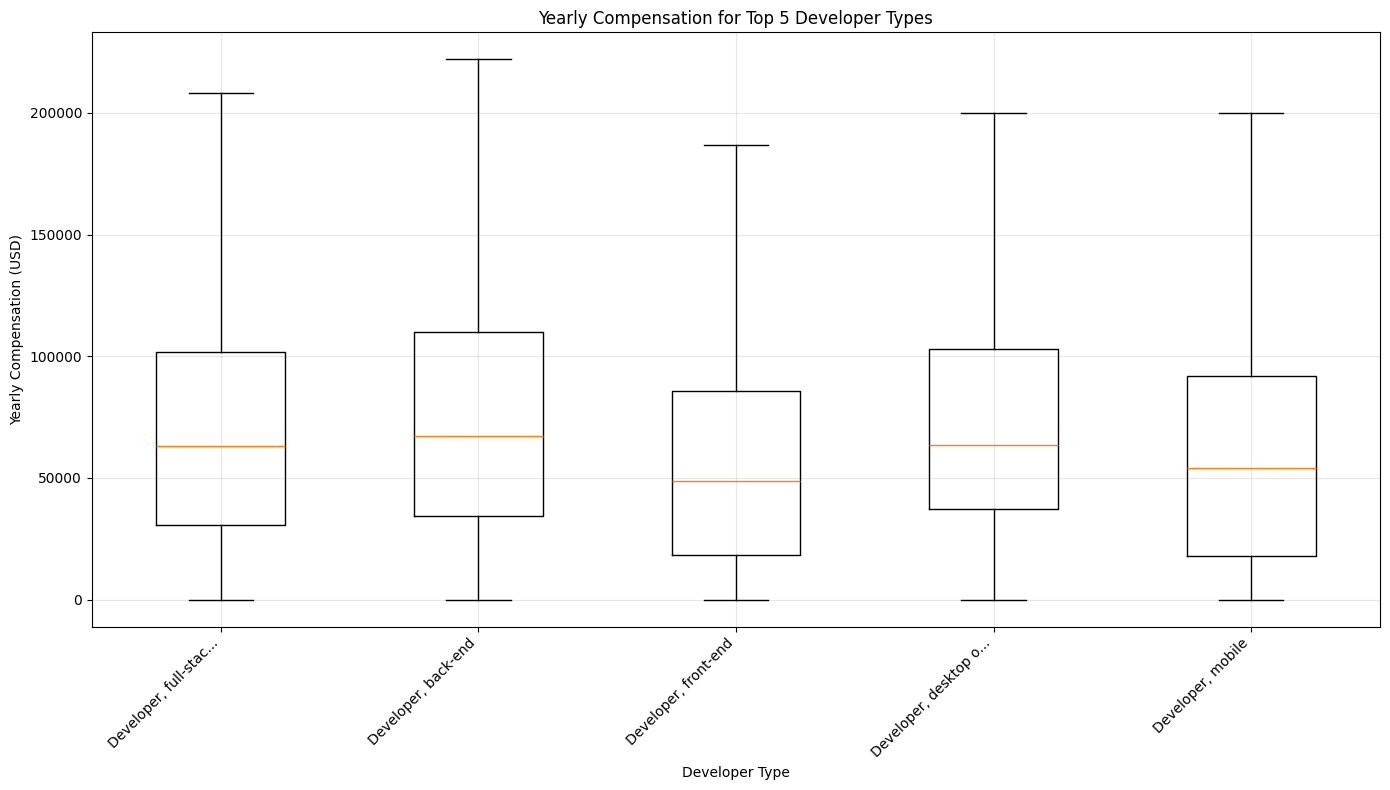

In [27]:
QUERY = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND ConvertedCompYearly > 0
AND DevType IS NOT NULL AND DevType != 'NA'
"""
df_dev_comp = pd.read_sql_query(QUERY, conn)

# Get top 5 developer types
top_dev_types = df_dev_comp['DevType'].value_counts().head(5).index

# Prepare data for box plot
dev_type_data = []
for dev_type in top_dev_types:
    # Split multiple selections and take the first one
    data = df_dev_comp[df_dev_comp['DevType'].str.contains(dev_type.split(';')[0])]['ConvertedCompYearly']
    dev_type_data.append(data)

# Shorten labels for better display
short_labels = [label.split(';')[0][:20] + '...' if len(label) > 20 else label for label in top_dev_types]

plt.figure(figsize=(14, 8))
plt.boxplot(dev_type_data, labels=short_labels, showfliers=False)
plt.title('Yearly Compensation for Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipython-input-1244588396.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_data, labels=top_countries, showfliers=False)


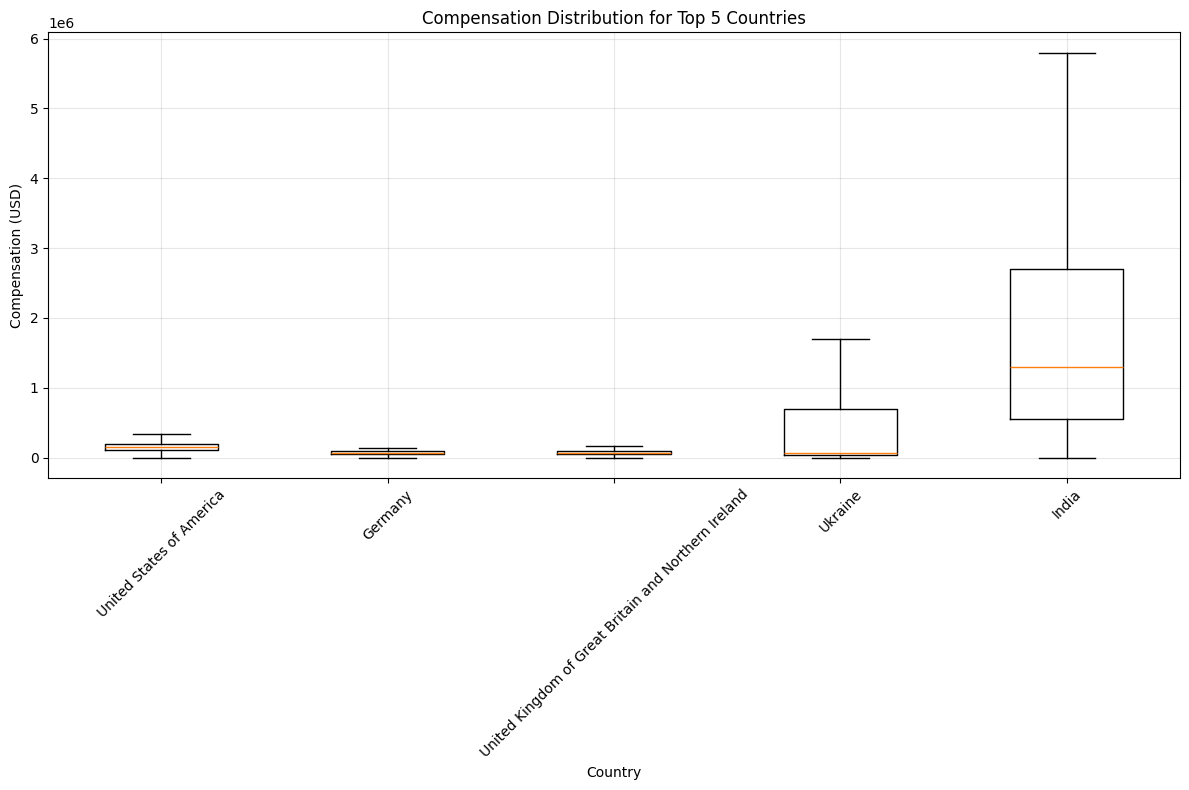

In [28]:
QUERY = """
SELECT Country, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
AND Country IS NOT NULL AND Country != 'NA'
"""
df_country_comp = pd.read_sql_query(QUERY, conn)

# Get top 5 countries
top_countries = df_country_comp['Country'].value_counts().head(5).index

# Prepare data for box plot
country_data = []
for country in top_countries:
    data = df_country_comp[df_country_comp['Country'] == country]['CompTotal']
    country_data.append(data)

plt.figure(figsize=(12, 8))
plt.boxplot(country_data, labels=top_countries, showfliers=False)
plt.title('Compensation Distribution for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipython-input-399747057.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(employment_data, labels=employment_types, showfliers=False)
/tmp/ipython-input-399747057.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


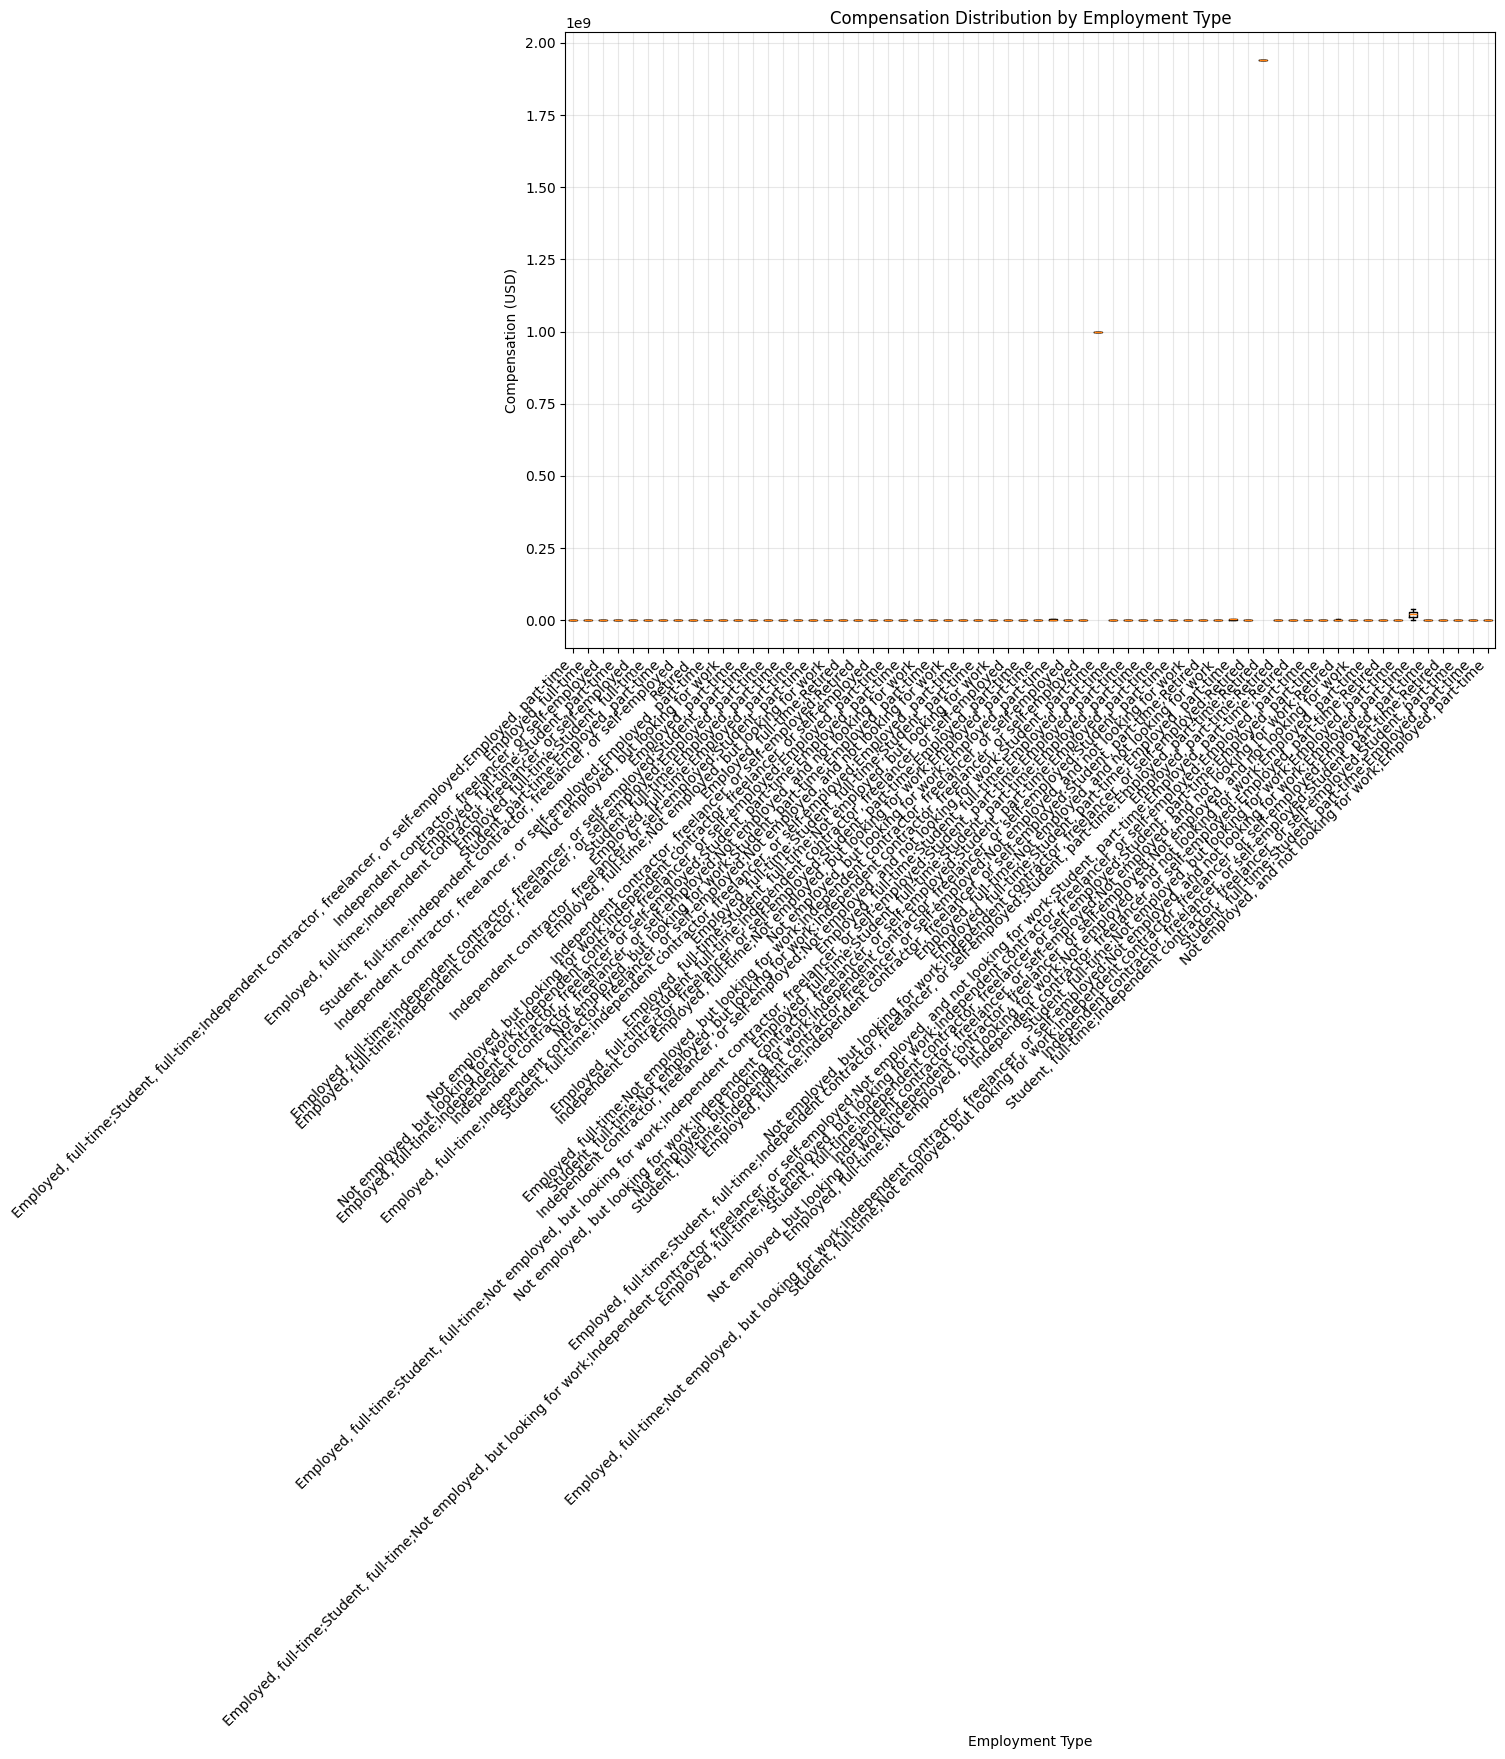

In [29]:
QUERY = """
SELECT Employment, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
AND Employment IS NOT NULL AND Employment != 'NA'
"""
df_employment_comp = pd.read_sql_query(QUERY, conn)

# Get employment types
employment_types = df_employment_comp['Employment'].unique()

# Prepare data for box plot
employment_data = []
for employment in employment_types:
    data = df_employment_comp[df_employment_comp['Employment'] == employment]['CompTotal']
    employment_data.append(data)

plt.figure(figsize=(12, 8))
plt.boxplot(employment_data, labels=employment_types, showfliers=False)
plt.title('Compensation Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipython-input-2609375871.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_years_data, labels=job_sat_levels, showfliers=False)


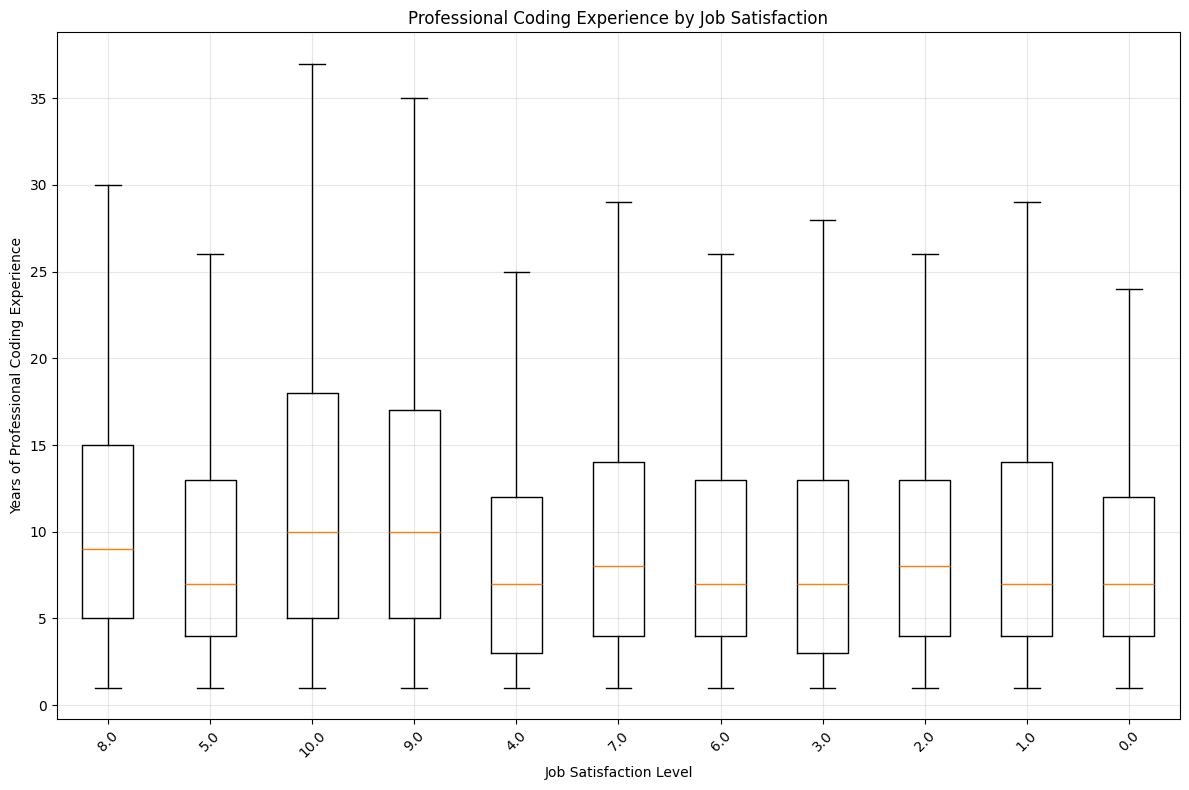

In [30]:
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL AND YearsCodePro != 'NA'
AND JobSat IS NOT NULL AND JobSat != 'NA'
"""
df_job_years = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro to numeric
df_job_years['YearsCodePro'] = pd.to_numeric(df_job_years['YearsCodePro'], errors='coerce')
df_job_years = df_job_years.dropna()

# Get job satisfaction levels
job_sat_levels = df_job_years['JobSat'].unique()

# Prepare data for box plot
job_years_data = []
for job_sat in job_sat_levels:
    data = df_job_years[df_job_years['JobSat'] == job_sat]['YearsCodePro']
    job_years_data.append(data)

plt.figure(figsize=(12, 8))
plt.boxplot(job_years_data, labels=job_sat_levels, showfliers=False)
plt.title('Professional Coding Experience by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [16]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
